# 기본 패키지 설치, 로드, 데이터 로드

In [ ]:
!pip install pyspark
!apt install openjdk-8-jdk-headless -qq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 37 kB/s 
     |████████████████████████████████| 199 kB 58.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=721ba7720c75b97f34508508e86096b21a2f3f2ec31bc5f1f79c30ecf56edcb6
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upg

In [ ]:
import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark import SparkContext, SparkConf


sc=pyspark.SparkContext()
spark = SparkSession.builder.getOrCreate()


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = spark.read.csv("/content/drive/MyDrive/빅데이터 처리 및 응용/팀플/heart_2020_cleaned.csv", header=True, inferSchema=True)

Mounted at /content/drive


# 데이터 EDA 및 전처리

In [ ]:
# 중복된 값 제거

print("원본 데이터 개수: ({}, {})".format(df.count(), len(df.columns)))

df2=df.distinct()

print("중복된 행 제거 후 데이터 개수: ({}, {})".format(df2.count(), len(df2.columns)))

원본 데이터 개수: (319795, 18)
중복된 행 제거 후 데이터 개수: (301717, 18)


In [ ]:
df2.show(5)

+------------+-----+-------+---------------+------+--------------+------------+-----------+------+-----------+-----+--------------------+----------------+---------+---------+------+-------------+----------+
|HeartDisease|  BMI|Smoking|AlcoholDrinking|Stroke|PhysicalHealth|MentalHealth|DiffWalking|   Sex|AgeCategory| Race|            Diabetic|PhysicalActivity|GenHealth|SleepTime|Asthma|KidneyDisease|SkinCancer|
+------------+-----+-------+---------------+------+--------------+------------+-----------+------+-----------+-----+--------------------+----------------+---------+---------+------+-------------+----------+
|          No| 27.2|    Yes|             No|   Yes|           0.0|         0.0|         No|  Male|80 or older|White|                  No|              No|Very good|      8.0|    No|           No|       Yes|
|          No|20.94|     No|             No|    No|          30.0|         0.0|         No|Female|      75-79|White|                  No|              No|     Poor|      6.

In [ ]:
# 스키마 정보 확인
df2.printSchema()

root
 |-- HeartDisease: string (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoking: string (nullable = true)
 |-- AlcoholDrinking: string (nullable = true)
 |-- Stroke: string (nullable = true)
 |-- PhysicalHealth: double (nullable = true)
 |-- MentalHealth: double (nullable = true)
 |-- DiffWalking: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- AgeCategory: string (nullable = true)
 |-- Race: string (nullable = true)
 |-- Diabetic: string (nullable = true)
 |-- PhysicalActivity: string (nullable = true)
 |-- GenHealth: string (nullable = true)
 |-- SleepTime: double (nullable = true)
 |-- Asthma: string (nullable = true)
 |-- KidneyDisease: string (nullable = true)
 |-- SkinCancer: string (nullable = true)



## 데이터 EDA

### 심장병 측면

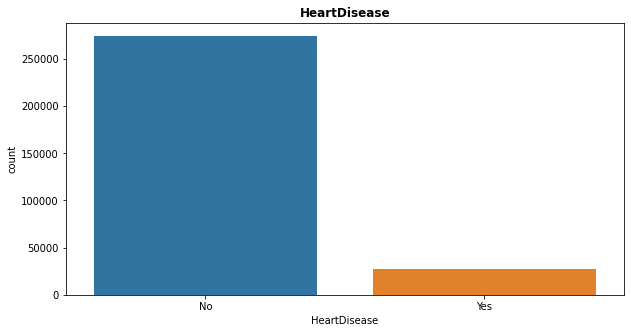

심장병 No인 경우 : 274456
심장병 Yes인 경우 : 27261
No/Yes 비율: 10


In [ ]:
# 매우 불균형한 데이터 셋, 심장병은 생명과 연관되는 부분이라 해결필요
# 10:1 비율임

origin_major_df2 = df2.filter(df2.HeartDisease == 'No')
origin_minor_df2 = df2.filter(df2.HeartDisease == 'Yes')

ratio = int(origin_major_df2.count()/origin_minor_df2.count())
a = range(ratio)

df_temp=df2.select(df2.HeartDisease).toPandas()

plt.figure(figsize=(10,5)) 

g = sns.countplot(x=df_temp['HeartDisease'])
g.set_title('HeartDisease', fontweight='bold')
plt.show()

print("심장병 No인 경우 : {}".format(origin_major_df2.count()))
print("심장병 Yes인 경우 : {}".format(origin_minor_df2 .count()))
print("No/Yes 비율: {}".format(ratio))

### 성별 관점

여성 심장병인 비율 : 0.07022565149588841
남성 심장병인 비율 : 0.11297748616645312


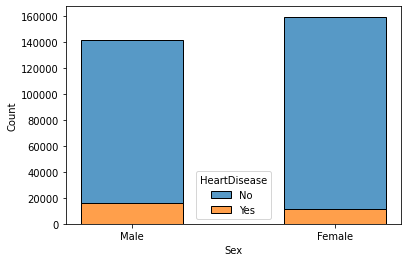

In [ ]:
# 남성이 약간 심장병 비율이 높음 

df_temp=df2.select(df2.HeartDisease, df2.Sex)
sns.histplot(data=df_temp.toPandas(), x='Sex', hue='HeartDisease', shrink=0.5, multiple='stack')

print("여성 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Sex == 'Female')).count() / df_temp.filter(df_temp.Sex=='Female').count()))
print("남성 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Sex == 'Male')).count() / df_temp.filter(df_temp.Sex=='Male').count()))


### 흡연 관점

흡연자인데 심장병인 비율 : 0.12540324163101918
비흡연자인데 심장병인 비율 : 0.06473449905915829


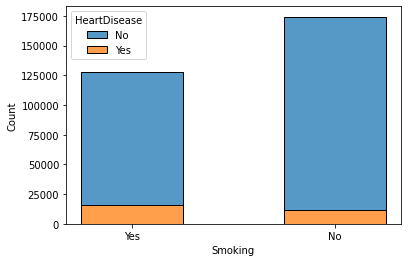

In [ ]:
# 비흡연자가 심장병 비율이 더 높은 편임
# 심장병을 가진 사람의 절반 이상은 흡연을 하는 편

df_temp=df2.select(df2.HeartDisease, df2.Smoking)
sns.histplot(data=df_temp.toPandas(), x='Smoking', hue='HeartDisease', shrink=0.5, multiple='stack')

print("흡연자인데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Smoking == 'Yes')).count() / df_temp.filter(df_temp.Smoking=='Yes').count()))
print("비흡연자인데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Smoking == 'No')).count() / df_temp.filter(df_temp.Smoking=='No').count()))


심장병 환자인데 흡연자인 경우 : 0.586075345731998


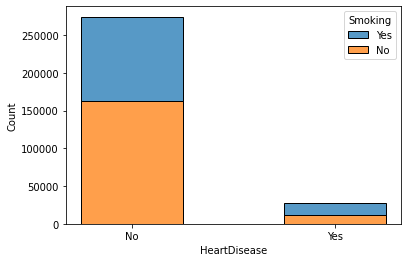

In [ ]:
# 심장병을 가진 환자의 절반 이상은 흡연을 함
sns.histplot(data=df_temp.toPandas(), x='HeartDisease', hue='Smoking', shrink=0.5, multiple='stack')

print("심장병 환자인데 흡연자인 경우 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Smoking == 'Yes')).count() / df_temp.filter(df_temp.HeartDisease=='Yes').count()))



### 음주 관점

애주가인데 심장병인 비율 : 0.052870580603308466
비 애주가인데 심장병인 비율 : 0.09324042607876175


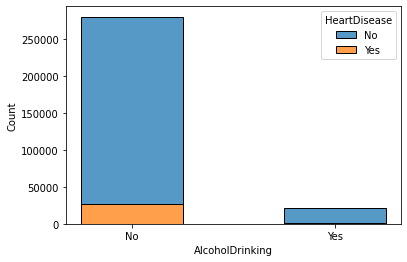

In [ ]:
# 음주 안하는 사람들이 심장병 비율이 더 높은 편임 (큰 차이는 x)


df_temp=df2.select(df2.HeartDisease, df2.AlcoholDrinking)
sns.histplot(data=df_temp.toPandas(), x='AlcoholDrinking', hue='HeartDisease', shrink=0.5, multiple='stack')

print("애주가인데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.AlcoholDrinking == 'Yes')).count() / df_temp.filter(df_temp.AlcoholDrinking=='Yes').count()))
print("비 애주가인데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.AlcoholDrinking == 'No')).count() / df_temp.filter(df_temp.AlcoholDrinking=='No').count()))

심장병 환자인데 애주가인 비율 : 0.04185466417226074


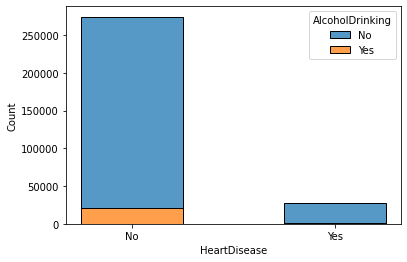

In [ ]:
# 심장병을 가진 환자의 음주 비율
sns.histplot(data=df_temp.toPandas(), x='HeartDisease', hue='AlcoholDrinking', shrink=0.5, multiple='stack')

print("심장병 환자인데 애주가인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.AlcoholDrinking == 'Yes')).count() / df_temp.filter(df_temp.HeartDisease=='Yes').count()))



### 천식, 심부전, 피부암은 병이 있으면 심장병인 비율이 높음

천식인데 심장병인 비율 : 0.11563621017092214
천식 아닌데 심장병인 비율 : 0.08619039163765219


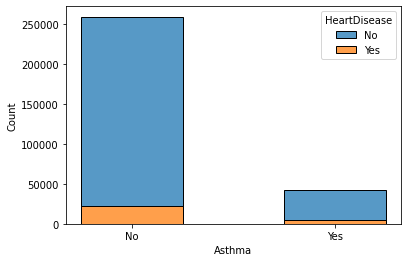

In [ ]:
# 대부분 천식이 아니지만 천식인 경우 심장병 비율이 더 높음 (큰차이 x)

df_temp=df2.select(df2.HeartDisease, df2.Asthma, df2.KidneyDisease, df2.SkinCancer)
df_temp2=df_temp.toPandas()

sns.histplot(data=df_temp2, x='Asthma', hue='HeartDisease', shrink=0.5, multiple='stack')

print("천식인데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Asthma== 'Yes')).count() / df_temp.filter(df_temp.Asthma=='Yes').count()))
print("천식 아닌데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Asthma == 'No')).count() / df_temp.filter(df_temp.Asthma=='No').count()))

심장병 환자인데 천식인 비율 : 0.18091779465170024


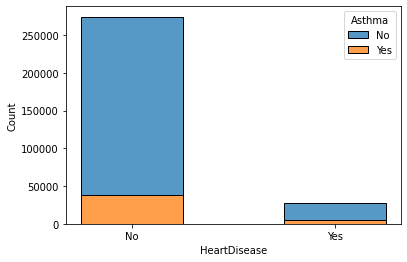

In [ ]:
# 심장병을 가진 환자의 천식 비율
sns.histplot(data=df_temp2, x='HeartDisease', hue='Asthma', shrink=0.5, multiple='stack')

print("심장병 환자인데 천식인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Asthma == 'Yes')).count() / df_temp.filter(df_temp.HeartDisease=='Yes').count()))



심부전인데 심장병인 비율 : 0.29330842391304346
심부전 아닌데 심장병인 비율 : 0.08210980854725616


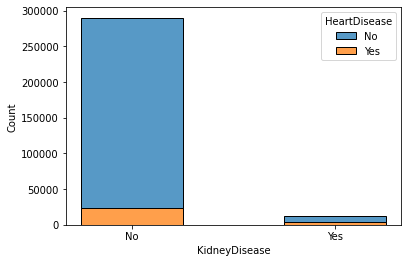

In [ ]:
# 대부분 심부전이 아니지만 심부전인 경우 심장병 비율이 더 높음 

sns.histplot(data=df_temp2, x='KidneyDisease', hue='HeartDisease', shrink=0.5, multiple='stack')

print("심부전인데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.KidneyDisease== 'Yes')).count() / df_temp.filter(df_temp.KidneyDisease=='Yes').count()))
print("심부전 아닌데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.KidneyDisease == 'No')).count() / df_temp.filter(df_temp.KidneyDisease=='No').count()))

심장병 환자인데 심부전인 비율 : 0.12670114816037562


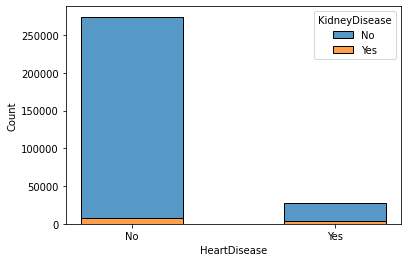

In [ ]:
# 심부전을 가진 환자의 천식 비율
sns.histplot(data=df_temp2, x='HeartDisease', hue='KidneyDisease', shrink=0.5, multiple='stack')

print("심장병 환자인데 심부전인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.KidneyDisease== 'Yes')).count() / df_temp.filter(df_temp.HeartDisease=='Yes').count()))



피부암인데 심장병인 비율 : 0.16960262187628022
피부암 아닌데 심장병인 비율 : 0.08183169679728365


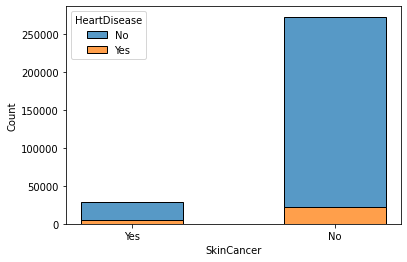

In [ ]:
# 대부분 피부암이 아니지만 피부암인 경우 심장병 비율이 더 높음 

sns.histplot(data=df_temp2, x='SkinCancer', hue='HeartDisease', shrink=0.5, multiple='stack')

print("피부암인데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.SkinCancer== 'Yes')).count() / df_temp.filter(df_temp.SkinCancer=='Yes').count()))
print("피부암 아닌데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.SkinCancer == 'No')).count() / df_temp.filter(df_temp.SkinCancer=='No').count()))

심장병 환자인데 심부전인 비율 : 0.18223836249587322


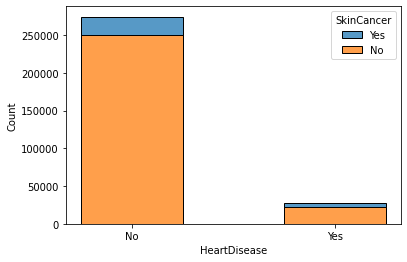

In [ ]:
# 피부암을 가진 환자의 천식 비율
sns.histplot(data=df_temp2, x='HeartDisease', hue='SkinCancer', shrink=0.5, multiple='stack')

print("심장병 환자인데 심부전인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.SkinCancer== 'Yes')).count() / df_temp.filter(df_temp.HeartDisease=='Yes').count()))

### 운동 관점

운동 했는데 심장병인 비율 : 0.07542575907504817
운동 안하고 심장병인 비율 : 0.1385877568192974


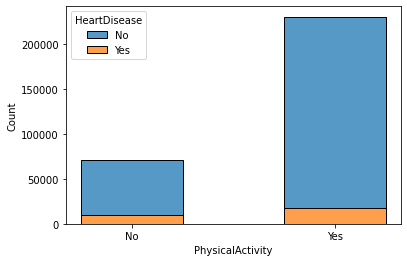

In [ ]:
# 최근 30일 운동 한 사람은 심장병 발생 빈도가 낮음

df_temp=df2.select(df2.HeartDisease, df2.PhysicalActivity)
df_temp2=df_temp.toPandas()

sns.histplot(data=df_temp2, x='PhysicalActivity', hue='HeartDisease', shrink=0.5, multiple='stack')

print("운동 했는데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.PhysicalActivity== 'Yes')).count() / df_temp.filter(df_temp.PhysicalActivity=='Yes').count()))
print("운동 안하고 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.PhysicalActivity == 'No')).count() / df_temp.filter(df_temp.PhysicalActivity=='No').count()))

심장병 환자인데 운동한 비율 : 0.6375041267745131


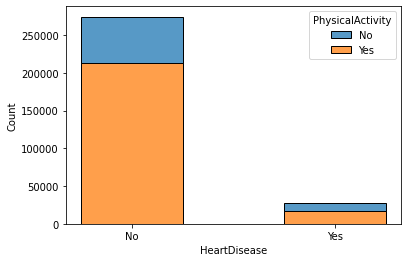

In [ ]:
# 기본적으로 운동은 크게 상관이 없어보임

sns.histplot(data=df_temp2, x='HeartDisease', hue='PhysicalActivity', shrink=0.5, multiple='stack')

print("심장병 환자인데 운동한 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.PhysicalActivity== 'Yes')).count() / df_temp.filter(df_temp.HeartDisease=='Yes').count()))

### DiffWalking 관점

걷는데 어려움이 있는데 심장병인 비율 : 0.22599481456431067
어려움이 없는데 심장병인 비율 : 0.06697569959823128


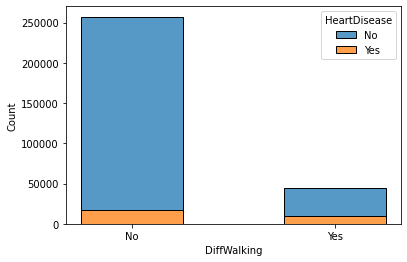

In [ ]:
## 걷는데 어려움이 있는 사람은 심장병 발생 빈도가 높음


df_temp=df2.select(df2.HeartDisease, df2.DiffWalking)
df_temp2=df_temp.toPandas()

sns.histplot(data=df_temp2, x='DiffWalking', hue='HeartDisease', shrink=0.5, multiple='stack')

print("걷는데 어려움이 있는데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.DiffWalking== 'Yes')).count() / df_temp.filter(df_temp.DiffWalking=='Yes').count()))
print("어려움이 없는데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.DiffWalking == 'No')).count() / df_temp.filter(df_temp.DiffWalking=='No').count()))

심장병 환자인데 걷는데 어려움이 있는 비율 : 0.3677047797219471


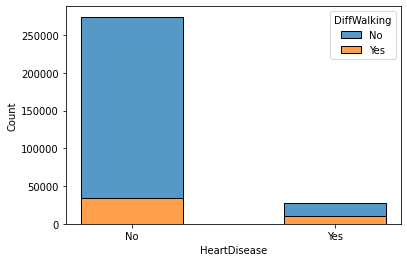

In [ ]:

sns.histplot(data=df_temp2, x='HeartDisease', hue='DiffWalking', shrink=0.5, multiple='stack')

print("심장병 환자인데 걷는데 어려움이 있는 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.DiffWalking== 'Yes')).count() / df_temp.filter(df_temp.HeartDisease=='Yes').count()))

### 당뇨, 뇌졸증 관점

당뇨 없는데 심장병인 비율 : 0.06916710352825303
당뇨 없는데 당뇨 근처인 사람 중 심장병인 비율 : 0.11644037780401417
임신중 당뇨 있는데 심장병인 비율 : 0.04225352112676056
당뇨 있는데 심장병인 비율 : 0.22045381753677104


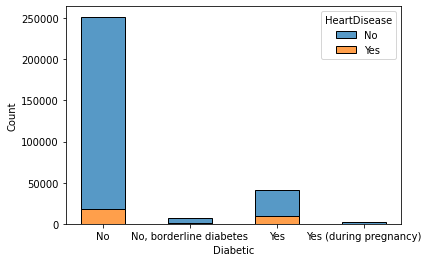

In [ ]:
## 당뇨가 있었던 사람은 심장병 발생 빈도가 높음

df_temp=df2.select(df2.HeartDisease, df2.Diabetic, df2.Stroke)
df_temp2=df_temp.toPandas()

sns.histplot(data=df_temp2, x='Diabetic', hue='HeartDisease', shrink=0.5, multiple='stack')

print("당뇨 없는데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Diabetic == 'No')).count() / df_temp.filter(df_temp.Diabetic=='No').count()))
print("당뇨 없는데 당뇨 근처인 사람 중 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Diabetic== 'No, borderline diabetes')).count() / df_temp.filter(df_temp.Diabetic=='No, borderline diabetes').count()))
print("임신중 당뇨 있는데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Diabetic== 'Yes (during pregnancy)')).count() / df_temp.filter(df_temp.Diabetic=='Yes (during pregnancy)').count()))
print("당뇨 있는데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Diabetic== 'Yes')).count() / df_temp.filter(df_temp.Diabetic=='Yes').count()))


뇌졸증 있는데 심장병인 비율 : 0.36380968169761274
뇌졸증 없는데 심장병인 비율 : 0.07896344936872741


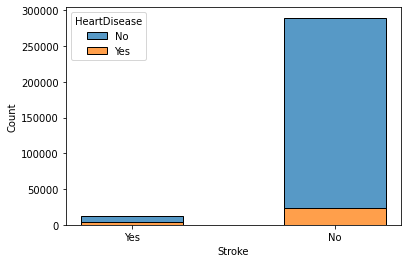

In [ ]:
## 뇌졸증 있는 사람들이 심장병 빈도가 높음

sns.histplot(data=df_temp2, x='Stroke', hue='HeartDisease', shrink=0.5, multiple='stack')

print("뇌졸증 있는데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Stroke== 'Yes')).count() / df_temp.filter(df_temp.Stroke=='Yes').count()))
print("뇌졸증 없는데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Stroke== 'No')).count() / df_temp.filter(df_temp.Stroke=='No').count()))

심장병 환자인데 걷는데 뇌졸증이 있는 비율 : 0.16099922966875757


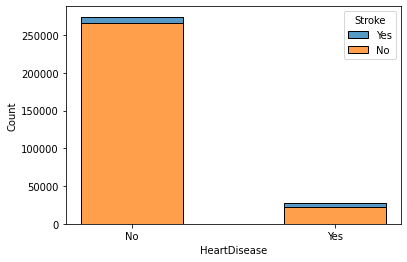

In [ ]:

sns.histplot(data=df_temp2, x='HeartDisease', hue='Stroke', shrink=0.5, multiple='stack')

print("심장병 환자인데 걷는데 뇌졸증이 있는 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Stroke== 'Yes')).count() / df_temp.filter(df_temp.HeartDisease=='Yes').count()))

### GenHealth(자신의 건강이 안좋다고 생각한 사람) 관점

Very good인데 심장병인 비율 : 0.05084163517691515
Fair인데 당뇨 근처인 사람 중 심장병인 비율 : 0.20436250324591015
Good인데 있는데 심장병인 비율 : 0.104176941877925
Poor인데 심장병인 비율 : 0.341130604288499
Excellent인데 심장병인 비율 : 0.02502636556907779


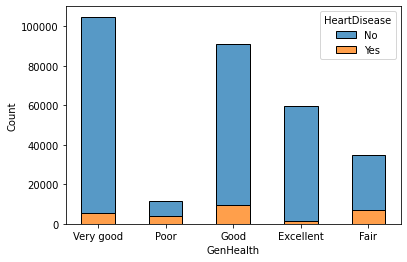

In [ ]:
## 당뇨가 있었던 사람은 심장병 발생 빈도가 높음

df_temp=df2.select(df2.HeartDisease, df2.GenHealth)
df_temp2=df_temp.toPandas()

sns.histplot(data=df_temp2, x='GenHealth', hue='HeartDisease', shrink=0.5, multiple='stack')

print("Very good인데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.GenHealth == 'Very good')).count() / df_temp.filter(df_temp.GenHealth=='Very good').count()))
print("Fair인데 당뇨 근처인 사람 중 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.GenHealth== 'Fair')).count() / df_temp.filter(df_temp.GenHealth=='Fair').count()))
print("Good인데 있는데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.GenHealth== 'Good')).count() / df_temp.filter(df_temp.GenHealth=='Good').count()))
print("Poor인데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.GenHealth== 'Poor')).count() / df_temp.filter(df_temp.GenHealth=='Poor').count()))
print("Excellent인데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.GenHealth== 'Excellent')).count() / df_temp.filter(df_temp.GenHealth=='Excellent').count()))



### 인종에 대한 관점

White인데 심장병인 비율 : 0.09834273067397376
Black인데 당뇨 근처인 사람 중 심장병인 비율 : 0.07580008768084173
Asian인데 있는데 심장병인 비율 : 0.03327911922932566
American Indian/Alaskan Native인데 심장병인 비율 : 0.10439137134052388
Hispanic인데 심장병인 비율 : 0.05323348212638802
Other인데 심장병인 비율 : 0.08135157469470204


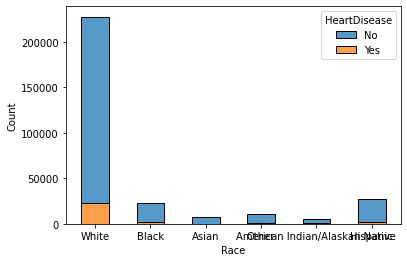

In [ ]:
# 인종에 대한 큰 차이는 없었음

## 당뇨가 있었던 사람은 심장병 발생 빈도가 높음

df_temp=df2.select(df2.HeartDisease, df2.Race)
df_temp2=df_temp.toPandas()

sns.histplot(data=df_temp2, x='Race', hue='HeartDisease', shrink=0.5, multiple='stack')

print("White인데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Race == 'White')).count() / df_temp.filter(df_temp.Race=='White').count()))
print("Black인데 당뇨 근처인 사람 중 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Race== 'Black')).count() / df_temp.filter(df_temp.Race=='Black').count()))
print("Asian인데 있는데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Race== 'Asian')).count() / df_temp.filter(df_temp.Race=='Asian').count()))
print("American Indian/Alaskan Native인데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Race== 'American Indian/Alaskan Native')).count() / df_temp.filter(df_temp.Race=='American Indian/Alaskan Native').count()))
print("Hispanic인데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Race== 'Hispanic')).count() / df_temp.filter(df_temp.Race=='Hispanic').count()))
print("Other인데 심장병인 비율 : {}".format(df_temp.filter((df_temp.HeartDisease == 'Yes') & (df_temp.Race== 'Other')).count() / df_temp.filter(df_temp.Race=='Other').count()))




### Sleep Time 관점

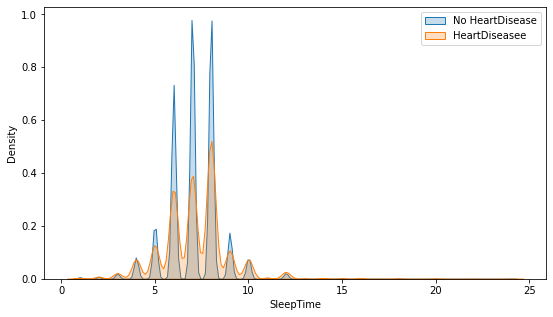

In [ ]:
# 수면시간이 식물인간처럼 24시간 내내 자는 분들 있음 -> 이상치 처리하기
# 수면 시간이 적절한 시간이 아니고 짧거나 길면 심장별 비율 높아짐

df_temp=df2.select(df2.HeartDisease, df2.SleepTime)
df_temp2=df_temp.toPandas()

plt.figure(figsize=(9,5))
sns.kdeplot(df_temp2[df_temp2["HeartDisease"]=='No']["SleepTime"], shade=True, label = 'No HeartDisease')
sns.kdeplot(df_temp2[df_temp2["HeartDisease"]=='Yes']["SleepTime"], shade=True, label = 'HeartDiseasee')
plt.legend()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


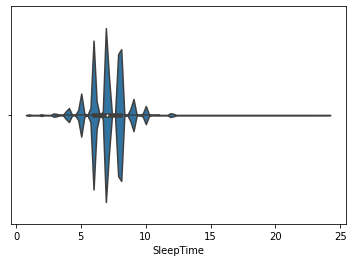

In [ ]:
sns.violinplot(df_temp2['SleepTime'])


### BMI 관점

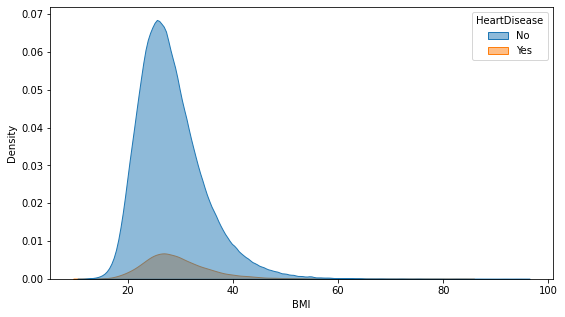

In [ ]:
# 큰 영향 같지는 않지만 BMI 크면 심장병 비율 높음


df_temp=df2.select(df2.HeartDisease, df2.BMI)
df_temp2=df_temp.toPandas()

plt.figure(figsize = (9, 5))
sns.kdeplot(x = df_temp2['BMI'], hue = df_temp2['HeartDisease'], alpha = 0.5, shade = True)

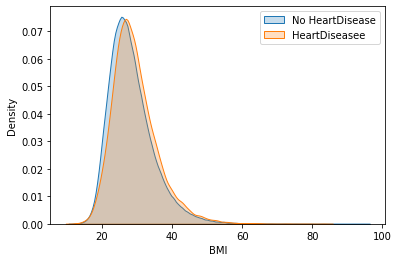

In [ ]:
# 심장병이 조금 더 오른쪽 치우친 걸 확인
sns.kdeplot(df_temp2[df_temp2["HeartDisease"]=='No']["BMI"], shade=True, label = 'No HeartDisease')
sns.kdeplot(df_temp2[df_temp2["HeartDisease"]=='Yes']["BMI"], shade=True, label = 'HeartDiseasee')
plt.legend()


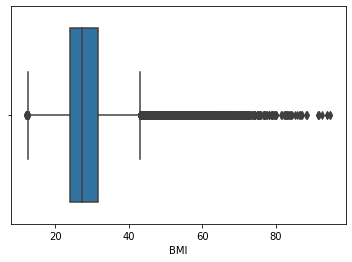

In [ ]:
sns.boxplot(x=df_temp2['BMI'])

### PhysicalHealth 관점

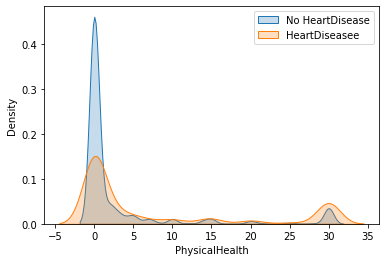

In [ ]:
# 값이 클 수록 아픈날이 많은 사람, 아픈 사람들이 심장병 비율이 많음

df_temp=df2.select(df2.HeartDisease, df2.PhysicalHealth)
df_temp2=df_temp.toPandas()

sns.kdeplot(df_temp2[df_temp2["HeartDisease"]=='No']["PhysicalHealth"], shade=True, label = 'No HeartDisease')
sns.kdeplot(df_temp2[df_temp2["HeartDisease"]=='Yes']["PhysicalHealth"], shade=True, label = 'HeartDiseasee')
plt.legend()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


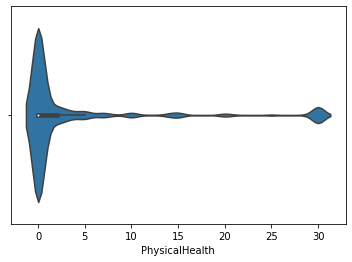

In [ ]:
sns.violinplot(df_temp2['PhysicalHealth'])


### MentalHealth 관점

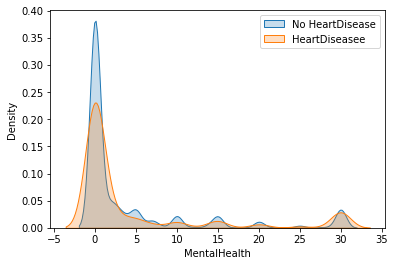

In [ ]:
# 값이 클 수록 아픈날이 많은 사람, 아픈 사람들이 심장병 비율이 많음

df_temp=df2.select(df2.HeartDisease, df2.MentalHealth)
df_temp2=df_temp.toPandas()

sns.kdeplot(df_temp2[df_temp2["HeartDisease"]=='No']["MentalHealth"], shade=True, label = 'No HeartDisease')
sns.kdeplot(df_temp2[df_temp2["HeartDisease"]=='Yes']["MentalHealth"], shade=True, label = 'HeartDiseasee')
plt.legend()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


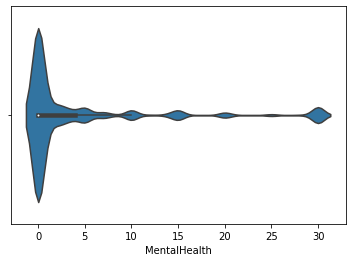

In [ ]:
sns.violinplot(df_temp2['MentalHealth'])


### 나이 관점

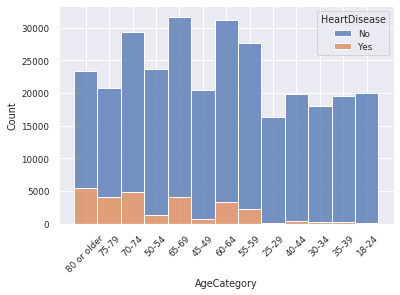

In [ ]:
# 나이 많으면 심장병 비율 높음, 복합적인 다른 질병까지 영향 받는 것 확인하기

df_temp=df2.select(df2.HeartDisease, df2.AgeCategory)
df_temp2=df_temp.toPandas()

plt.xticks(rotation=45)
sns.histplot(data=df_temp2, x='AgeCategory', hue='HeartDisease', multiple='stack', shrink=1)

### 나이와 기타 관계 (나이먹을 수록 합병증 증가)

In [ ]:
from pyspark.sql.functions import when

df_temp=df2
df_temp=df_temp.withColumn("Age_temp", when(df_temp.AgeCategory=="18-24", 20)
  .when(df_temp.AgeCategory=="25-29", 25.0)
  .when(df_temp.AgeCategory=="30-34", 30.0)
  .when(df_temp.AgeCategory=="35-39", 35.0)
  .when(df_temp.AgeCategory=="40-44", 40.0)
  .when(df_temp.AgeCategory=="45-49", 45.0)
  .when(df_temp.AgeCategory=="50-54", 50.0)
  .when(df_temp.AgeCategory=="55-59", 55.0)
  .when(df_temp.AgeCategory=="60-64", 60.0)
  .when(df_temp.AgeCategory=="65-69", 65.0)
  .when(df_temp.AgeCategory=="70-74", 70.0)
  .when(df_temp.AgeCategory=="75-79", 75.0)
  .otherwise(80.0))

df_temp.show()

+------------+-----+-------+---------------+------+--------------+------------+-----------+------+-----------+-----+--------------------+----------------+---------+---------+------+-------------+----------+--------+
|HeartDisease|  BMI|Smoking|AlcoholDrinking|Stroke|PhysicalHealth|MentalHealth|DiffWalking|   Sex|AgeCategory| Race|            Diabetic|PhysicalActivity|GenHealth|SleepTime|Asthma|KidneyDisease|SkinCancer|Age_temp|
+------------+-----+-------+---------------+------+--------------+------------+-----------+------+-----------+-----+--------------------+----------------+---------+---------+------+-------------+----------+--------+
|          No| 27.2|    Yes|             No|   Yes|           0.0|         0.0|         No|  Male|80 or older|White|                  No|              No|Very good|      8.0|    No|           No|       Yes|    80.0|
|          No|20.94|     No|             No|    No|          30.0|         0.0|         No|Female|      75-79|White|                  No

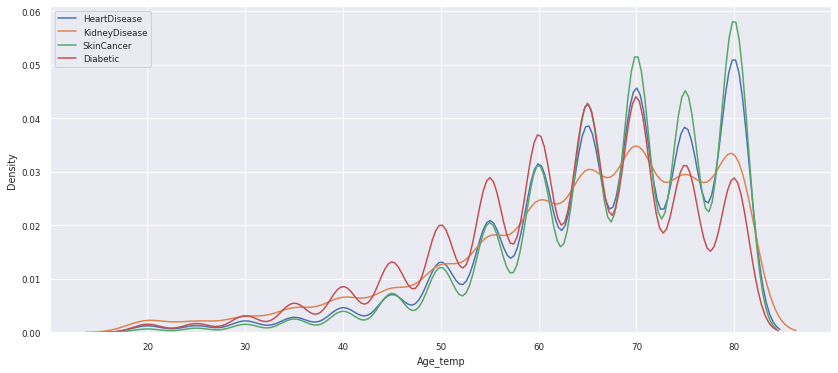

In [ ]:
# 나이가 늘어남에 따라 질병이 복합적으로 늘어남

df_temp=df_temp.select(df_temp.HeartDisease, df_temp.Age_temp, df_temp.KidneyDisease, df_temp.SkinCancer, df_temp.Diabetic)
df_temp2=df_temp.toPandas()

fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(df_temp2[df_temp2["HeartDisease"]=='Yes']["Age_temp"], shade = False, label="HeartDisease", ax = ax)
sns.kdeplot(df_temp2[df_temp2["KidneyDisease"]=='Yes']["Age_temp"], shade = False, label="KidneyDisease", ax = ax) # 신부전
sns.kdeplot(df_temp2[df_temp2["SkinCancer"]=='Yes']["Age_temp"], shade = False, label="SkinCancer", ax = ax)
sns.kdeplot(df_temp2[df_temp2["Diabetic"]=='Yes']["Age_temp"], shade = False, label="Diabetic", ax = ax)
plt.legend()

### 수치형 히트맵 확인 (최종 히트맵은 전처리 후 확인)

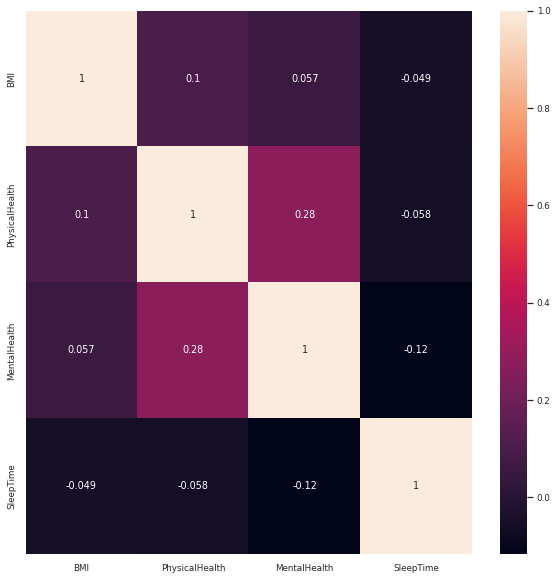

In [ ]:
df_temp=df2.toPandas()
plt.figure(figsize=(10, 10))
sns.heatmap(df_temp.corr(), annot= True)
     